In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

print(tf.__version__)


2.1.0


In [22]:
from data_processing import import_and_clean_train, label_encoding

train_X, test_X, train_y, test_y, labels_dict = import_and_clean_train('train', label_encoding)

print(train_X.columns)
train_X.head()

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'PoolArea', 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition
0,20,3,65.0,7800,1,3,3,0,4,0,...,4,4,2,64,0,0,0,0,8,4
1,50,4,51.0,6120,1,3,3,0,4,0,...,1,4,2,90,0,205,0,0,8,0
2,20,3,90.0,12378,1,0,3,0,4,0,...,4,4,2,208,175,0,0,0,8,4
3,20,3,70.0,7420,1,3,3,0,4,0,...,4,4,2,0,0,0,0,0,8,4
4,50,4,52.0,9439,1,3,3,0,4,0,...,1,1,2,0,0,192,0,0,8,4


In [23]:
# Converting the data to arrays
train_X = np.array(train_X)
train_y = np.array(train_y)
test_X = np.array(test_X)
test_y = np.array(test_y)

Preprocessing: defining the normalizer and adapting it to the train set:

In [24]:
scaler = preprocessing.StandardScaler().fit(train_X)

train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

Function to plot the loss (mean absolute error) at each epoch:

In [27]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 200000])
    plt.xlabel('Epoch')
    plt.ylabel('Error [SalePrice]')
    plt.legend()
    plt.grid(True)

Function to train and evaluate a model which layers are defined outside it:

In [30]:
def train_and_evaluate(model, train_x, train_y, val_x, val_y, epochs=100):

    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

    history = model.fit(x=train_X, y=train_y, validation_data=(val_x, val_y), verbose=0, epochs=epochs)

    plot_loss(history)

Preliminary model:

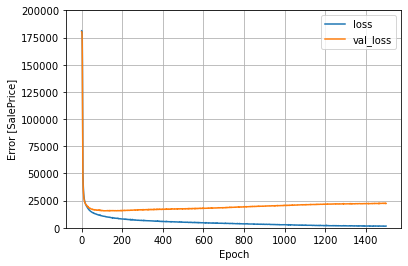

In [36]:
model = models.Sequential()
model.add(layers.Dense(67, activation='relu'))
model.add(layers.Dense(67, activation='relu'))
model.add(layers.Dense(67, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

train_and_evaluate(model, train_X, train_y, test_X, test_y, epochs=1500)

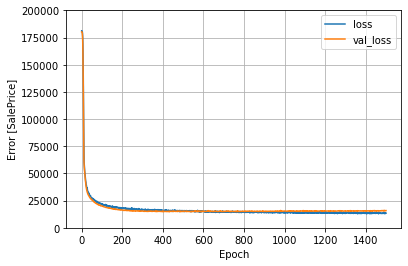

In [35]:
model = models.Sequential()
model.add(layers.Dense(67, activation='relu'))
model.add(layers.Dropout(.1))
model.add(layers.Dense(67, activation='relu'))
model.add(layers.Dropout(.1))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

train_and_evaluate(model, train_X, train_y, test_X, test_y, epochs=1500)

The plot functions below will be used for the evaluation and improvement, they still have to be properly incorporated.

In [ ]:
display(test_predictions)

a = plt.axes(aspect='equal')
plt.scatter(test_y, test_predictions)
plt.xlabel('True Values [SalePrice]')
plt.ylabel('Predictions [SalePrice]')
lims = [0, 900000000000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\mv\anaconda3\envs\mLab\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\mv\AppData\Local\Temp/ipykernel_7300/2058816117.py", line 1, in <module>
    display(test_predictions)
NameError: name 'test_predictions' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mv\anaconda3\envs\mLab\lib\site-packages\IPython\core\interactiveshell.py", line 2064, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mv\anaconda3\envs\mLab\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offse

In [ ]:
error = test_predictions - test_y
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [SalePrice]')
_ = plt.ylabel('Count')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\mv\anaconda3\envs\mLab\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\mv\AppData\Local\Temp/ipykernel_7300/2008805401.py", line 1, in <module>
    error = test_predictions - test_y
NameError: name 'test_predictions' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mv\anaconda3\envs\mLab\lib\site-packages\IPython\core\interactiveshell.py", line 2064, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mv\anaconda3\envs\mLab\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, 